#  Barclays x GA: Python Day 3 - Pandas and EDA

---

<a id="learning-objectives"></a>
## Learning Objectives
*After completing this notebook, you will be able to:*

- Define what Pandas is and how it relates to data science.
- Manipulate Pandas `DataFrames` and `Series`.
- Filter and sort data using Pandas.
- Manipulate `DataFrame` columns.
- Understand the different kinds of missing data, and know how to handle null and missing values.
- Visualise data with a range of different charts

## Contents:
* [Introduction to Pandas](#pandas-intro)
* [DataFrame methods and attributes](#dataframe-methods)
* [Setting values](#setting-values)
* [Selecting columns](#selecting-cols)
* [Transforming columns](#transforming-cols)
* [Selecting rows](#selecting-rows)
* [Sorting data](#sorting-data)
* [Missing data](#missing-data)
* [Value counts](#value-counts)
* [Grouping](#groupby)
* [Visualisations](#visualisations)


<a id="pandas-intro"></a>

# <font color='blue'> Introduction to Pandas

Pandas is a Python library that primarily adds two new datatypes to Python: `DataFrame` and `Series`.

- A `Series` is a sequence of items, where each item has a unique label (called an `index`).
- A `DataFrame` is a table of data. Each row has a unique label (the `row index`), and each column has a unique label (the `column index`).
- Note that each column in a `DataFrame` can be considered a `Series` (`Series` index).

Behind the scenes, these datatypes use the `numpy` (numerical Python) library. NumPy primarily adds the `ndarray` (n-dimensional array) datatype to Pandas. An `ndarray` is similar to a Python list, in that it stores ordered data. However, it differs in three respects:

* Each element has the same datatype (typically fixed-size, e.g., a 32-bit integer).
* Elements are stored contiguously (immediately after each other) in memory for fast retrieval.
* The total size of an `ndarray` is fixed.

Storing `Series` and `DataFrame` data in `ndarray`s makes Pandas faster and uses less memory than standard Python datatypes. Many libraries (such as scikit-learn) accept `ndarray`s as input rather than Pandas datatypes, so we will frequently convert between them.


## Using Pandas

Pandas is frequently used in data science because it offers a large set of commonly used functions, is relatively fast, and has a large community. Because many data science libraries also use NumPy to manipulate data, you can easily transfer data between libraries (as we will often do in this class!).

Pandas is a large library that typically takes a lot of practice to learn. 

It heavily overrides Python operators, resulting in odd-looking syntax. For example, given a `DataFrame` called `cars` which contains a column `mpg`, we might want to view all cars with mpg over 35. To do this, we might write: `cars[cars['mpg'] > 35]`. 

In standard Python, this would most likely give a syntax error.  

Pandas also highly favors certain patterns of use. 

For example, looping through a `DataFrame` row by row is highly discouraged. 

Instead, Pandas favors using **vectorized functions** that operate column by column. (This is because each column is stored separately as an `ndarray`, and NumPy is optimized for operating on `ndarray`s.)

Do not be discouraged if Pandas feels overwhelming. Gradually, as you use it, you will become familiar with which methods to use and the "Pandas way" of thinking about and manipulating data.

---
## <font color='red'> Exercise: Reading in pay gap data
    
Today we'll be working with a dataset on the gender pay gap across companies in the UK. 

Let's start by reading in a CSV as a Pandas `DataFrame`.

1. Use the `read_csv()` Pandas function to read in a file from the `Data` directory (which is inside the directory this notebook is in). 

The file has been downloaded from https://gender-pay-gap.service.gov.uk/viewing/download. It's called `UK Gender Pay Gap Data - 2019 to 2020.csv`; read this in as a DataFrame called `pay_gap_2019_20`
    

2. Use the `head` command on `pay_gap_2019_20` to visually inspect the data. What's strange about it? Use `read_csv()` again but try playing around with the `header` parameter (e.g. `read_csv(header=5)`) until the final DataFrame looks right. What does the `header` parameter do?


3. Continue to inspect `pay_gap_2019_20` visually and figure out:

    
* What the data contains
 
* What each column corresponds to
    
* What each row corresponds to
    

3. Use `shape` to figure out how many rows are in `pay_gap_2019_20`. 

4. List as many potential data quality issues as you can in `pay_gap_2019_20`

---

<a id="dataframe-methods"></a>

# <font color='blue'> DataFrame Methods and Attributes

We've seen that Pandas `DataFrame` is perhaps the most important class of object in Pandas, and comes with a set of attributes (or properties) and methods that can be applied specifically to Pandas ``DataFrames``. 

We start by importing ``pandas`` and reading in a CSV file using the ``read_csv`` function. The ``header=2`` parameter specifies that the column names are in row ``2`` of the underlying CSV file.

We preview the first five rows of the ``DataFrame`` using the ``head`` method. 


In [1]:
import pandas as pd

In [10]:
pay_gap_2019_20 = pd.read_csv('./data/UK Gender Pay Gap Data - 2019 to 2020.csv',header=2)
pay_gap_2019_20.head(5)


,EmployerName,Address,CompanyNumber,SicCodes,DiffMeanHourlyPercent,DiffMedianHourlyPercent,DiffMeanBonusPercent,DiffMedianBonusPercent,MaleBonusPercent,FemaleBonusPercent,...,FemaleUpperMiddleQuartile,MaleTopQuartile,FemaleTopQuartile,CompanyLinkToGPGInfo,ResponsiblePerson,EmployerSize,CurrentName,SubmittedAfterTheDeadline,DueDate,DateSubmitted
0,1ST CHOICE STAFF RECRUITMENT LIMITED,"1ST CHOICE RECRUITMENT,\r\n8 St. Loyes Street,...",7972006,78109,-2.3,0.0,-114.8,-249.3,1.1,0.4,...,37.1,50.0,50.0,https://www.1stchoice.net/gender-pay-gap-repor...,Gill Knight (MD),250 to 499,1ST CHOICE STAFF RECRUITMENT LIMITED,False,05/04/2020 00:00,24/01/2020 09:37
1,23.5 DEGREES LIMITED,"Unit 3 Hedge End Retail Park, Charles Watts Wa...",8014079,56103,10.0,0.0,79.0,35.0,4.0,2.0,...,70.0,31.0,69.0,https://www.23-5degrees.com/gender-pay-gap,Luca Contardo (CFO),500 to 999,23.5 DEGREES LIMITED,False,05/04/2020 00:00,11/11/2019 15:33
2,A. & B. GLASS COMPANY LIMITED,"Addison Road,\r\nChilton Industrial Estate,\r\...",1543721,43342,19.0,4.0,42.0,45.0,70.0,41.0,...,24.0,90.0,10.0,NaN,PHILIP FARNELL (GROUP HR MANAGER),250 to 499,A. & B. GLASS COMPANY LIMITED,False,05/04/2020 00:00,20/05/2019 16:34
3,A.B.M. CATERING LIMITED,"Eagle Court,\r\n63-67 Saltisford,\r\nWarwick,\...",4168334,"56290,\r\n70100",21.7,16.5,-70.3,61.5,15.1,6.5,...,87.8,33.9,66.1,http://www.abmcatering.co.uk/wp-content/upload...,Sue Hill (Finance & HR Director - Operations),1000 to 4999,A.B.M. CATERING LIMITED,False,05/04/2020 00:00,29/01/2020 12:20
4,A.G. BARR P.L.C.,"Westfield House,\r\n4 Mollins Road,\r\nCumbern...",SC005653,11070,2.3,-6.8,41.9,-3.0,93.1,94.3,...,24.0,65.0,35.0,https://www.agbarr.co.uk/responsibility/we-act...,Doug Brown (Head of Human Resources),500 to 999,A.G. BARR P.L.C.,False,05/04/2020 00:00,23/01/2020 11:57


We can access the index, which is a numbering system that labels each row with a unique number according to its position in the DataFrame (like indexing in a list)

In [3]:
pay_gap_2019_20.index

RangeIndex(start=0, stop=992, step=1)

We can also quickly access the column names

In [4]:
pay_gap_2019_20.columns

Index(['EmployerName', 'Address', 'CompanyNumber', 'SicCodes',
       'DiffMeanHourlyPercent', 'DiffMedianHourlyPercent',
       'DiffMeanBonusPercent', 'DiffMedianBonusPercent', 'MaleBonusPercent',
       'FemaleBonusPercent', 'MaleLowerQuartile', 'FemaleLowerQuartile',
       'MaleLowerMiddleQuartile', 'FemaleLowerMiddleQuartile',
       'MaleUpperMiddleQuartile', 'FemaleUpperMiddleQuartile',
       'MaleTopQuartile', 'FemaleTopQuartile', 'CompanyLinkToGPGInfo',
       'ResponsiblePerson', 'EmployerSize', 'CurrentName',
       'SubmittedAfterTheDeadline', 'DueDate', 'DateSubmitted'],
      dtype='object')

The ``shape`` attribute is a good way of figuring out how big our dataset is

In [11]:
pay_gap_2019_20.shape

(992, 25)

We can confirm that our ``DataFrame`` is the correct type

In [12]:
type(pay_gap_2019_20)     

pandas.core.frame.DataFrame

## Checking data types

We can check the types of data in individual columns. **But first, we need to deliberately engineer a problem with our data by runnng the cell below**

In [13]:
pay_gap_2019_20 = pay_gap_2019_20.astype({'DiffMedianHourlyPercent': 'str',
                                         'DiffMeanBonusPercent': 'str',
                                         'DiffMeanHourlyPercent':'str'})

Now we can check the types using `dtypes()`

In [14]:
pay_gap_2019_20.dtypes

EmployerName                  object
Address                       object
CompanyNumber                 object
SicCodes                      object
DiffMeanHourlyPercent         object
DiffMedianHourlyPercent       object
DiffMeanBonusPercent          object
DiffMedianBonusPercent       float64
MaleBonusPercent             float64
FemaleBonusPercent           float64
MaleLowerQuartile            float64
FemaleLowerQuartile          float64
MaleLowerMiddleQuartile      float64
FemaleLowerMiddleQuartile    float64
MaleUpperMiddleQuartile      float64
FemaleUpperMiddleQuartile    float64
MaleTopQuartile              float64
FemaleTopQuartile            float64
CompanyLinkToGPGInfo          object
ResponsiblePerson             object
EmployerSize                  object
CurrentName                   object
SubmittedAfterTheDeadline       bool
DueDate                       object
DateSubmitted                 object
dtype: object

We can see that most of the columns in our dataset are ``float64``, i.e. floating point or **decimal** numbers.

But we can also see that the `DiffMeanHourlyPercent`, `DiffMedianHourlyPercent` and `DiffMeanBonusPercent` columns are **not** a numeric type. If a column in a DataFrame contains a mix of types, Pandas labels its type as `object`.

Since we want Pandas to treat these columns as numeric columns, we need to convert it using the `to_numeric` function. 

In [15]:
pay_gap_2019_20['DiffMeanHourlyPercent'] = pd.to_numeric(pay_gap_2019_20['DiffMeanHourlyPercent'])



Now when we run `dtypes` again, we can see the `DiffMeanHourlyPercent` column has a numeric type.

In [16]:
pay_gap_2019_20.dtypes

EmployerName                  object
Address                       object
CompanyNumber                 object
SicCodes                      object
DiffMeanHourlyPercent        float64
DiffMedianHourlyPercent       object
DiffMeanBonusPercent          object
DiffMedianBonusPercent       float64
MaleBonusPercent             float64
FemaleBonusPercent           float64
MaleLowerQuartile            float64
FemaleLowerQuartile          float64
MaleLowerMiddleQuartile      float64
FemaleLowerMiddleQuartile    float64
MaleUpperMiddleQuartile      float64
FemaleUpperMiddleQuartile    float64
MaleTopQuartile              float64
FemaleTopQuartile            float64
CompanyLinkToGPGInfo          object
ResponsiblePerson             object
EmployerSize                  object
CurrentName                   object
SubmittedAfterTheDeadline       bool
DueDate                       object
DateSubmitted                 object
dtype: object

That leaves the `DiffMedianHourlyPercent` and `DiffMeanBonusPercent` columns to convert. Instead of running `to_numeric()` two more times, it's more efficient to convert multiple columns to different types using the `astype` method.

**Note that the information we give Pandas about which columns to convert, and which types to convert them to, is formatted as a dictionary**

In [17]:
pay_gap_2019_20 = pay_gap_2019_20.astype({'DiffMedianHourlyPercent': 'float64',
                                         'DiffMeanBonusPercent': 'float64'})


Running `dtypes` a final time, we see that all the columns in our DataFrame are of the correct type.

In [18]:
pay_gap_2019_20.dtypes

EmployerName                  object
Address                       object
CompanyNumber                 object
SicCodes                      object
DiffMeanHourlyPercent        float64
DiffMedianHourlyPercent      float64
DiffMeanBonusPercent         float64
DiffMedianBonusPercent       float64
MaleBonusPercent             float64
FemaleBonusPercent           float64
MaleLowerQuartile            float64
FemaleLowerQuartile          float64
MaleLowerMiddleQuartile      float64
FemaleLowerMiddleQuartile    float64
MaleUpperMiddleQuartile      float64
FemaleUpperMiddleQuartile    float64
MaleTopQuartile              float64
FemaleTopQuartile            float64
CompanyLinkToGPGInfo          object
ResponsiblePerson             object
EmployerSize                  object
CurrentName                   object
SubmittedAfterTheDeadline       bool
DueDate                       object
DateSubmitted                 object
dtype: object

<a id="setting-values"></a>

# <font color='blue'> Setting values in a DataFrame

To change the value of a single element in a DataFrame, we use the `at` method.

We pass it the position of the element we want to set the value of, in the format `[index,column_name]`

In [21]:
pay_gap_2019_20.at[0,'Address'] = 'test value 2'

In [22]:
pay_gap_2019_20.head()

,EmployerName,Address,CompanyNumber,SicCodes,DiffMeanHourlyPercent,DiffMedianHourlyPercent,DiffMeanBonusPercent,DiffMedianBonusPercent,MaleBonusPercent,FemaleBonusPercent,...,FemaleUpperMiddleQuartile,MaleTopQuartile,FemaleTopQuartile,CompanyLinkToGPGInfo,ResponsiblePerson,EmployerSize,CurrentName,SubmittedAfterTheDeadline,DueDate,DateSubmitted
0,test value,test value 2,7972006,78109,-2.3,0.0,-114.8,-249.3,1.1,0.4,...,37.1,50.0,50.0,https://www.1stchoice.net/gender-pay-gap-repor...,Gill Knight (MD),250 to 499,1ST CHOICE STAFF RECRUITMENT LIMITED,False,05/04/2020 00:00,24/01/2020 09:37
1,23.5 DEGREES LIMITED,"Unit 3 Hedge End Retail Park, Charles Watts Wa...",8014079,56103,10.0,0.0,79.0,35.0,4.0,2.0,...,70.0,31.0,69.0,https://www.23-5degrees.com/gender-pay-gap,Luca Contardo (CFO),500 to 999,23.5 DEGREES LIMITED,False,05/04/2020 00:00,11/11/2019 15:33
2,A. & B. GLASS COMPANY LIMITED,"Addison Road,\r\nChilton Industrial Estate,\r\...",1543721,43342,19.0,4.0,42.0,45.0,70.0,41.0,...,24.0,90.0,10.0,NaN,PHILIP FARNELL (GROUP HR MANAGER),250 to 499,A. & B. GLASS COMPANY LIMITED,False,05/04/2020 00:00,20/05/2019 16:34
3,A.B.M. CATERING LIMITED,"Eagle Court,\r\n63-67 Saltisford,\r\nWarwick,\...",4168334,"56290,\r\n70100",21.7,16.5,-70.3,61.5,15.1,6.5,...,87.8,33.9,66.1,http://www.abmcatering.co.uk/wp-content/upload...,Sue Hill (Finance & HR Director - Operations),1000 to 4999,A.B.M. CATERING LIMITED,False,05/04/2020 00:00,29/01/2020 12:20
4,A.G. BARR P.L.C.,"Westfield House,\r\n4 Mollins Road,\r\nCumbern...",SC005653,11070,2.3,-6.8,41.9,-3.0,93.1,94.3,...,24.0,65.0,35.0,https://www.agbarr.co.uk/responsibility/we-act...,Doug Brown (Head of Human Resources),500 to 999,A.G. BARR P.L.C.,False,05/04/2020 00:00,23/01/2020 11:57


<a id="selecting-cols"></a>

# <font color='blue'> Selecting columns

Pandas DataFrames have structural similarities with Python-style lists and dictionaries. We can select, or extract, columns from a `DataFrame` using column names.



In the example below, we select a column of data using the name of the column in a similar manner to how we select a dictionary value with the dictionary key.

In [23]:
pay_gap_2019_20['EmployerName']

0                            test value
1                  23.5 DEGREES LIMITED
2         A. & B. GLASS COMPANY LIMITED
3               A.B.M. CATERING LIMITED
4                      A.G. BARR P.L.C.
                     ...               
987    YORKSHIRE CAUSEWAY SCHOOLS TRUST
988        YOUR HOMES NEWCASTLE LIMITED
989           YOUR LEISURE KENT LIMITED
990                ZEN INTERNET LIMITED
991              ZF SERVICES UK LIMITED
Name: EmployerName, Length: 992, dtype: object

The result is a Pandas **series**. We can think of this as being the Pandas equivalent of a list.

In [24]:
type(pay_gap_2019_20['EmployerName'])

pandas.core.series.Series

We can also select a single column using this syntax

In [25]:
pay_gap_2019_20[['EmployerName']]

,EmployerName
0,test value
1,23.5 DEGREES LIMITED
2,A. & B. GLASS COMPANY LIMITED
3,A.B.M. CATERING LIMITED
4,A.G. BARR P.L.C.
...,...
987,YORKSHIRE CAUSEWAY SCHOOLS TRUST
988,YOUR HOMES NEWCASTLE LIMITED
989,YOUR LEISURE KENT LIMITED
990,ZEN INTERNET LIMITED


The result is a DataFrame

In [26]:
type(pay_gap_2019_20[['EmployerName']])

pandas.core.frame.DataFrame

We can select multiple columns using this syntax too.

In [27]:
pay_gap_2019_20[['EmployerName','Address']]

,EmployerName,Address
0,test value,test value 2
1,23.5 DEGREES LIMITED,"Unit 3 Hedge End Retail Park, Charles Watts Wa..."
2,A. & B. GLASS COMPANY LIMITED,"Addison Road,\r\nChilton Industrial Estate,\r\..."
3,A.B.M. CATERING LIMITED,"Eagle Court,\r\n63-67 Saltisford,\r\nWarwick,\..."
4,A.G. BARR P.L.C.,"Westfield House,\r\n4 Mollins Road,\r\nCumbern..."
...,...,...
987,YORKSHIRE CAUSEWAY SCHOOLS TRUST,"St Aidan's Church Of England High School,\r\nO..."
988,YOUR HOMES NEWCASTLE LIMITED,"Civic Centre,\r\nBarras Bridge,\r\nNewcastle U..."
989,YOUR LEISURE KENT LIMITED,NaN
990,ZEN INTERNET LIMITED,"Sandbrook House Sandbrook Park,\r\nSandbrook W..."


A neater way of doing it could be using this syntax, which does exactly the same thing.

In [ ]:
columns_to_select = ['EmployerName','Address']  

pay_gap_2019_20[columns_to_select]            

<a id="transforming-cols"></a>

# <font color='blue'> Transforming columns
    
Once we've selected columns, we can perform transformations on them (e.g converting an entire column to lowercase) or calculations with them (e.g. adding two columns together to create a new column).

## Changing column names

There are a few different ways to change column names. 

### Renaming individual columns

Individual column names can be changed like this. We could add as many columns as we wanted to the dictionary below, in the format `{'old_column_name':'new_column_name'}`

`rename` is by default **not** an **in place** method, i.e. it doesn't change the underlying DataFrame. In order to make methods **in place** we need to add an extra input to the `rename` method; `inplace=True`

In [28]:
pay_gap_2019_20.head()

,EmployerName,Address,CompanyNumber,SicCodes,DiffMeanHourlyPercent,DiffMedianHourlyPercent,DiffMeanBonusPercent,DiffMedianBonusPercent,MaleBonusPercent,FemaleBonusPercent,...,FemaleUpperMiddleQuartile,MaleTopQuartile,FemaleTopQuartile,CompanyLinkToGPGInfo,ResponsiblePerson,EmployerSize,CurrentName,SubmittedAfterTheDeadline,DueDate,DateSubmitted
0,test value,test value 2,7972006,78109,-2.3,0.0,-114.8,-249.3,1.1,0.4,...,37.1,50.0,50.0,https://www.1stchoice.net/gender-pay-gap-repor...,Gill Knight (MD),250 to 499,1ST CHOICE STAFF RECRUITMENT LIMITED,False,05/04/2020 00:00,24/01/2020 09:37
1,23.5 DEGREES LIMITED,"Unit 3 Hedge End Retail Park, Charles Watts Wa...",8014079,56103,10.0,0.0,79.0,35.0,4.0,2.0,...,70.0,31.0,69.0,https://www.23-5degrees.com/gender-pay-gap,Luca Contardo (CFO),500 to 999,23.5 DEGREES LIMITED,False,05/04/2020 00:00,11/11/2019 15:33
2,A. & B. GLASS COMPANY LIMITED,"Addison Road,\r\nChilton Industrial Estate,\r\...",1543721,43342,19.0,4.0,42.0,45.0,70.0,41.0,...,24.0,90.0,10.0,NaN,PHILIP FARNELL (GROUP HR MANAGER),250 to 499,A. & B. GLASS COMPANY LIMITED,False,05/04/2020 00:00,20/05/2019 16:34
3,A.B.M. CATERING LIMITED,"Eagle Court,\r\n63-67 Saltisford,\r\nWarwick,\...",4168334,"56290,\r\n70100",21.7,16.5,-70.3,61.5,15.1,6.5,...,87.8,33.9,66.1,http://www.abmcatering.co.uk/wp-content/upload...,Sue Hill (Finance & HR Director - Operations),1000 to 4999,A.B.M. CATERING LIMITED,False,05/04/2020 00:00,29/01/2020 12:20
4,A.G. BARR P.L.C.,"Westfield House,\r\n4 Mollins Road,\r\nCumbern...",SC005653,11070,2.3,-6.8,41.9,-3.0,93.1,94.3,...,24.0,65.0,35.0,https://www.agbarr.co.uk/responsibility/we-act...,Doug Brown (Head of Human Resources),500 to 999,A.G. BARR P.L.C.,False,05/04/2020 00:00,23/01/2020 11:57


In [32]:
pay_gap_2019_20.head()

,EmployerName,EmployerAddress,CompanyNumber,SicCodes,DiffMeanHourlyPercent,DiffMedianHourlyPercent,DiffMeanBonusPercent,DiffMedianBonusPercent,MaleBonusPercent,FemaleBonusPercent,...,FemaleUpperMiddleQuartile,MaleTopQuartile,FemaleTopQuartile,CompanyLinkToGPGInfo,ResponsiblePerson,EmployerSize,CurrentName,SubmittedAfterTheDeadline,DueDate,DateSubmitted
0,test value,test value 2,7972006,78109,-2.3,0.0,-114.8,-249.3,1.1,0.4,...,37.1,50.0,50.0,https://www.1stchoice.net/gender-pay-gap-repor...,Gill Knight (MD),250 to 499,1ST CHOICE STAFF RECRUITMENT LIMITED,False,05/04/2020 00:00,24/01/2020 09:37
1,23.5 DEGREES LIMITED,"Unit 3 Hedge End Retail Park, Charles Watts Wa...",8014079,56103,10.0,0.0,79.0,35.0,4.0,2.0,...,70.0,31.0,69.0,https://www.23-5degrees.com/gender-pay-gap,Luca Contardo (CFO),500 to 999,23.5 DEGREES LIMITED,False,05/04/2020 00:00,11/11/2019 15:33
2,A. & B. GLASS COMPANY LIMITED,"Addison Road,\r\nChilton Industrial Estate,\r\...",1543721,43342,19.0,4.0,42.0,45.0,70.0,41.0,...,24.0,90.0,10.0,NaN,PHILIP FARNELL (GROUP HR MANAGER),250 to 499,A. & B. GLASS COMPANY LIMITED,False,05/04/2020 00:00,20/05/2019 16:34
3,A.B.M. CATERING LIMITED,"Eagle Court,\r\n63-67 Saltisford,\r\nWarwick,\...",4168334,"56290,\r\n70100",21.7,16.5,-70.3,61.5,15.1,6.5,...,87.8,33.9,66.1,http://www.abmcatering.co.uk/wp-content/upload...,Sue Hill (Finance & HR Director - Operations),1000 to 4999,A.B.M. CATERING LIMITED,False,05/04/2020 00:00,29/01/2020 12:20
4,A.G. BARR P.L.C.,"Westfield House,\r\n4 Mollins Road,\r\nCumbern...",SC005653,11070,2.3,-6.8,41.9,-3.0,93.1,94.3,...,24.0,65.0,35.0,https://www.agbarr.co.uk/responsibility/we-act...,Doug Brown (Head of Human Resources),500 to 999,A.G. BARR P.L.C.,False,05/04/2020 00:00,23/01/2020 11:57


In [31]:
pay_gap_2019_20.rename(columns={'Address':'EmployerAddress'},inplace=True)


Now we can see the column has been renamed 

In [ ]:
pay_gap_2019_20.head(2)

### Renaming all columns

It's also possible to rename **all** the columns in a DataFrame using the syntax

``DataFrame.columns = [full list of new column names]``

---

## Creating new columns

We can create new columns by performing calculations on existing columns. Let's say we want to create a new column that gives the Difference in Mean Hourly Pay as a proportion rather than a percentage. 

In [33]:
pay_gap_2019_20['DiffMeanHourlyPercent']/100

0     -0.023
1      0.100
2      0.190
3      0.217
4      0.023
       ...  
987    0.290
988   -0.056
989   -0.121
990    0.219
991    0.076
Name: DiffMeanHourlyPercent, Length: 992, dtype: float64

In [34]:
pay_gap_2019_20['DiffMeanHourlyProportion'] = pay_gap_2019_20['DiffMeanHourlyPercent']/100
pay_gap_2019_20.head()

,EmployerName,EmployerAddress,CompanyNumber,SicCodes,DiffMeanHourlyPercent,DiffMedianHourlyPercent,DiffMeanBonusPercent,DiffMedianBonusPercent,MaleBonusPercent,FemaleBonusPercent,...,MaleTopQuartile,FemaleTopQuartile,CompanyLinkToGPGInfo,ResponsiblePerson,EmployerSize,CurrentName,SubmittedAfterTheDeadline,DueDate,DateSubmitted,DiffMeanHourlyProportion
0,test value,test value 2,7972006,78109,-2.3,0.0,-114.8,-249.3,1.1,0.4,...,50.0,50.0,https://www.1stchoice.net/gender-pay-gap-repor...,Gill Knight (MD),250 to 499,1ST CHOICE STAFF RECRUITMENT LIMITED,False,05/04/2020 00:00,24/01/2020 09:37,-0.023
1,23.5 DEGREES LIMITED,"Unit 3 Hedge End Retail Park, Charles Watts Wa...",8014079,56103,10.0,0.0,79.0,35.0,4.0,2.0,...,31.0,69.0,https://www.23-5degrees.com/gender-pay-gap,Luca Contardo (CFO),500 to 999,23.5 DEGREES LIMITED,False,05/04/2020 00:00,11/11/2019 15:33,0.100
2,A. & B. GLASS COMPANY LIMITED,"Addison Road,\r\nChilton Industrial Estate,\r\...",1543721,43342,19.0,4.0,42.0,45.0,70.0,41.0,...,90.0,10.0,NaN,PHILIP FARNELL (GROUP HR MANAGER),250 to 499,A. & B. GLASS COMPANY LIMITED,False,05/04/2020 00:00,20/05/2019 16:34,0.190
3,A.B.M. CATERING LIMITED,"Eagle Court,\r\n63-67 Saltisford,\r\nWarwick,\...",4168334,"56290,\r\n70100",21.7,16.5,-70.3,61.5,15.1,6.5,...,33.9,66.1,http://www.abmcatering.co.uk/wp-content/upload...,Sue Hill (Finance & HR Director - Operations),1000 to 4999,A.B.M. CATERING LIMITED,False,05/04/2020 00:00,29/01/2020 12:20,0.217
4,A.G. BARR P.L.C.,"Westfield House,\r\n4 Mollins Road,\r\nCumbern...",SC005653,11070,2.3,-6.8,41.9,-3.0,93.1,94.3,...,65.0,35.0,https://www.agbarr.co.uk/responsibility/we-act...,Doug Brown (Head of Human Resources),500 to 999,A.G. BARR P.L.C.,False,05/04/2020 00:00,23/01/2020 11:57,0.023


## Removing columns

We can use the `drop` method to do this. Once again, unless we specify that the method is `inplace` the underlying DataFrame won't be changed.

In [35]:
pay_gap_2019_20.drop(columns=['DateSubmitted','DueDate'],inplace=True)
pay_gap_2019_20.head()

,EmployerName,EmployerAddress,CompanyNumber,SicCodes,DiffMeanHourlyPercent,DiffMedianHourlyPercent,DiffMeanBonusPercent,DiffMedianBonusPercent,MaleBonusPercent,FemaleBonusPercent,...,MaleUpperMiddleQuartile,FemaleUpperMiddleQuartile,MaleTopQuartile,FemaleTopQuartile,CompanyLinkToGPGInfo,ResponsiblePerson,EmployerSize,CurrentName,SubmittedAfterTheDeadline,DiffMeanHourlyProportion
0,test value,test value 2,7972006,78109,-2.3,0.0,-114.8,-249.3,1.1,0.4,...,62.9,37.1,50.0,50.0,https://www.1stchoice.net/gender-pay-gap-repor...,Gill Knight (MD),250 to 499,1ST CHOICE STAFF RECRUITMENT LIMITED,False,-0.023
1,23.5 DEGREES LIMITED,"Unit 3 Hedge End Retail Park, Charles Watts Wa...",8014079,56103,10.0,0.0,79.0,35.0,4.0,2.0,...,30.0,70.0,31.0,69.0,https://www.23-5degrees.com/gender-pay-gap,Luca Contardo (CFO),500 to 999,23.5 DEGREES LIMITED,False,0.100
2,A. & B. GLASS COMPANY LIMITED,"Addison Road,\r\nChilton Industrial Estate,\r\...",1543721,43342,19.0,4.0,42.0,45.0,70.0,41.0,...,76.0,24.0,90.0,10.0,NaN,PHILIP FARNELL (GROUP HR MANAGER),250 to 499,A. & B. GLASS COMPANY LIMITED,False,0.190
3,A.B.M. CATERING LIMITED,"Eagle Court,\r\n63-67 Saltisford,\r\nWarwick,\...",4168334,"56290,\r\n70100",21.7,16.5,-70.3,61.5,15.1,6.5,...,12.2,87.8,33.9,66.1,http://www.abmcatering.co.uk/wp-content/upload...,Sue Hill (Finance & HR Director - Operations),1000 to 4999,A.B.M. CATERING LIMITED,False,0.217
4,A.G. BARR P.L.C.,"Westfield House,\r\n4 Mollins Road,\r\nCumbern...",SC005653,11070,2.3,-6.8,41.9,-3.0,93.1,94.3,...,76.0,24.0,65.0,35.0,https://www.agbarr.co.uk/responsibility/we-act...,Doug Brown (Head of Human Resources),500 to 999,A.G. BARR P.L.C.,False,0.023


## Applying functions to columns

Sometimes we'll want to perform a calculation or operation on each row of a DataFrame column. There are a few different ways to do this.

### Vectorised functions

In Pandas it's discouraged to loop through all the rows in a DataFrame, applying a function or operation to each row. 

Vectorised functions, which quickly apply a function to an entire column without having to explicitly write a loop, are much faster and more efficient. 

Here are some examples.

We can convert columns to lowercase.

In [41]:
pay_gap_2019_20['EmployerName'] = pay_gap_2019_20['EmployerName'].str.lower()

In [42]:
pay_gap_2019_20.head(5)

,EmployerName,EmployerAddress,CompanyNumber,SicCodes,DiffMeanHourlyPercent,DiffMedianHourlyPercent,DiffMeanBonusPercent,DiffMedianBonusPercent,MaleBonusPercent,FemaleBonusPercent,...,MaleUpperMiddleQuartile,FemaleUpperMiddleQuartile,MaleTopQuartile,FemaleTopQuartile,CompanyLinkToGPGInfo,ResponsiblePerson,EmployerSize,CurrentName,SubmittedAfterTheDeadline,DiffMeanHourlyProportion
0,test value,test value 2,7972006,78109,-2.3,0.0,-114.8,-249.3,1.1,0.4,...,62.9,37.1,50.0,50.0,https://www.1stchoice.net/gender-pay-gap-repor...,Gill Knight (MD),250 to 499,1ST CHOICE STAFF RECRUITMENT LIMITED,False,-0.023
1,23.5 degrees limited,"Unit 3 Hedge End Retail Park, Charles Watts Wa...",8014079,56103,10.0,0.0,79.0,35.0,4.0,2.0,...,30.0,70.0,31.0,69.0,https://www.23-5degrees.com/gender-pay-gap,Luca Contardo (CFO),500 to 999,23.5 DEGREES LIMITED,False,0.100
2,a. & b. glass company limited,"Addison Road,\r\nChilton Industrial Estate,\r\...",1543721,43342,19.0,4.0,42.0,45.0,70.0,41.0,...,76.0,24.0,90.0,10.0,NaN,PHILIP FARNELL (GROUP HR MANAGER),250 to 499,A. & B. GLASS COMPANY LIMITED,False,0.190
3,a.b.m. catering limited,"Eagle Court,\r\n63-67 Saltisford,\r\nWarwick,\...",4168334,"56290,\r\n70100",21.7,16.5,-70.3,61.5,15.1,6.5,...,12.2,87.8,33.9,66.1,http://www.abmcatering.co.uk/wp-content/upload...,Sue Hill (Finance & HR Director - Operations),1000 to 4999,A.B.M. CATERING LIMITED,False,0.217
4,a.g. barr p.l.c.,"Westfield House,\r\n4 Mollins Road,\r\nCumbern...",SC005653,11070,2.3,-6.8,41.9,-3.0,93.1,94.3,...,76.0,24.0,65.0,35.0,https://www.agbarr.co.uk/responsibility/we-act...,Doug Brown (Head of Human Resources),500 to 999,A.G. BARR P.L.C.,False,0.023


We can replace strings. This can be used to remove strings, too by replacing them with a blank space or `''`

In [43]:
pay_gap_2019_20['EmployerName'] = pay_gap_2019_20['EmployerName'].str.replace('limited','')

In [44]:
pay_gap_2019_20.head(5)

,EmployerName,EmployerAddress,CompanyNumber,SicCodes,DiffMeanHourlyPercent,DiffMedianHourlyPercent,DiffMeanBonusPercent,DiffMedianBonusPercent,MaleBonusPercent,FemaleBonusPercent,...,MaleUpperMiddleQuartile,FemaleUpperMiddleQuartile,MaleTopQuartile,FemaleTopQuartile,CompanyLinkToGPGInfo,ResponsiblePerson,EmployerSize,CurrentName,SubmittedAfterTheDeadline,DiffMeanHourlyProportion
0,test value,test value 2,7972006,78109,-2.3,0.0,-114.8,-249.3,1.1,0.4,...,62.9,37.1,50.0,50.0,https://www.1stchoice.net/gender-pay-gap-repor...,Gill Knight (MD),250 to 499,1ST CHOICE STAFF RECRUITMENT LIMITED,False,-0.023
1,23.5 degrees,"Unit 3 Hedge End Retail Park, Charles Watts Wa...",8014079,56103,10.0,0.0,79.0,35.0,4.0,2.0,...,30.0,70.0,31.0,69.0,https://www.23-5degrees.com/gender-pay-gap,Luca Contardo (CFO),500 to 999,23.5 DEGREES LIMITED,False,0.100
2,a. & b. glass company,"Addison Road,\r\nChilton Industrial Estate,\r\...",1543721,43342,19.0,4.0,42.0,45.0,70.0,41.0,...,76.0,24.0,90.0,10.0,NaN,PHILIP FARNELL (GROUP HR MANAGER),250 to 499,A. & B. GLASS COMPANY LIMITED,False,0.190
3,a.b.m. catering,"Eagle Court,\r\n63-67 Saltisford,\r\nWarwick,\...",4168334,"56290,\r\n70100",21.7,16.5,-70.3,61.5,15.1,6.5,...,12.2,87.8,33.9,66.1,http://www.abmcatering.co.uk/wp-content/upload...,Sue Hill (Finance & HR Director - Operations),1000 to 4999,A.B.M. CATERING LIMITED,False,0.217
4,a.g. barr p.l.c.,"Westfield House,\r\n4 Mollins Road,\r\nCumbern...",SC005653,11070,2.3,-6.8,41.9,-3.0,93.1,94.3,...,76.0,24.0,65.0,35.0,https://www.agbarr.co.uk/responsibility/we-act...,Doug Brown (Head of Human Resources),500 to 999,A.G. BARR P.L.C.,False,0.023


We can also perform calculations with entire columns.

In [45]:
pay_gap_2019_20['DiffMedianHourlyPercent']*100

0         0.0
1         0.0
2       400.0
3      1650.0
4      -680.0
        ...  
987    5400.0
988   -1710.0
989     -40.0
990    1870.0
991    1130.0
Name: DiffMedianHourlyPercent, Length: 992, dtype: float64

---
## <font color='red'> Exercise: Column calculations
    
1. Figure out how to use the `mean()` `DataFrame` method to work out the mean value of the 
`DiffMeanHourlyPercent` column.


2. Drop the `FemaleTopQuartile` column from the `DataFrame`.


---

<a id="selecting-rows"></a>

# <font color='blue'> Selecting rows

## Selecting rows by index

We can use the `loc` command to pick out a specific row of a DataFrame.

We use the syntax `loc[a,b]` where `a` is the index of the row we want to access, and `b` is the name of the column. 

As with lists, `:` means 'give me everything' so in this example below, we're accessing the **first** row of data and **all** the columns.

In [46]:
pay_gap_2019_20.loc[0,:]

EmployerName                                                        test value
EmployerAddress                                                   test value 2
CompanyNumber                                                          7972006
SicCodes                                                                 78109
DiffMeanHourlyPercent                                                     -2.3
DiffMedianHourlyPercent                                                      0
DiffMeanBonusPercent                                                    -114.8
DiffMedianBonusPercent                                                  -249.3
MaleBonusPercent                                                           1.1
FemaleBonusPercent                                                         0.4
MaleLowerQuartile                                                         50.8
FemaleLowerQuartile                                                       49.2
MaleLowerMiddleQuartile                             

We can specify a **range** of rows we want to extract. This gives us rows **0** to **2** **inclusive of row 5** and all the columns.

In [47]:
pay_gap_2019_20.loc[0:2,:]

,EmployerName,EmployerAddress,CompanyNumber,SicCodes,DiffMeanHourlyPercent,DiffMedianHourlyPercent,DiffMeanBonusPercent,DiffMedianBonusPercent,MaleBonusPercent,FemaleBonusPercent,...,MaleUpperMiddleQuartile,FemaleUpperMiddleQuartile,MaleTopQuartile,FemaleTopQuartile,CompanyLinkToGPGInfo,ResponsiblePerson,EmployerSize,CurrentName,SubmittedAfterTheDeadline,DiffMeanHourlyProportion
0,test value,test value 2,7972006,78109,-2.3,0.0,-114.8,-249.3,1.1,0.4,...,62.9,37.1,50.0,50.0,https://www.1stchoice.net/gender-pay-gap-repor...,Gill Knight (MD),250 to 499,1ST CHOICE STAFF RECRUITMENT LIMITED,False,-0.023
1,23.5 degrees,"Unit 3 Hedge End Retail Park, Charles Watts Wa...",8014079,56103,10.0,0.0,79.0,35.0,4.0,2.0,...,30.0,70.0,31.0,69.0,https://www.23-5degrees.com/gender-pay-gap,Luca Contardo (CFO),500 to 999,23.5 DEGREES LIMITED,False,0.100
2,a. & b. glass company,"Addison Road,\r\nChilton Industrial Estate,\r\...",1543721,43342,19.0,4.0,42.0,45.0,70.0,41.0,...,76.0,24.0,90.0,10.0,NaN,PHILIP FARNELL (GROUP HR MANAGER),250 to 499,A. & B. GLASS COMPANY LIMITED,False,0.190


We can specify rows and single columns, too.

In [48]:
pay_gap_2019_20.loc[0:2,'EmployerName']

0                test value
1             23.5 degrees 
2    a. & b. glass company 
Name: EmployerName, dtype: object

Or the rows we want plus the list of columns we want.

In [49]:
pay_gap_2019_20.loc[0:2,['EmployerName','EmployerAddress']]

,EmployerName,EmployerAddress
0,test value,test value 2
1,23.5 degrees,"Unit 3 Hedge End Retail Park, Charles Watts Wa..."
2,a. & b. glass company,"Addison Road,\r\nChilton Industrial Estate,\r\..."


Or, the rows we want and the **range** of columns we want (notice the `:` operator again)

In [50]:
pay_gap_2019_20.loc[0:2,'EmployerName':'SicCodes']

,EmployerName,EmployerAddress,CompanyNumber,SicCodes
0,test value,test value 2,7972006,78109
1,23.5 degrees,"Unit 3 Hedge End Retail Park, Charles Watts Wa...",8014079,56103
2,a. & b. glass company,"Addison Road,\r\nChilton Industrial Estate,\r\...",1543721,43342


## Selecting rows using logical tests

Often we won't know the exact index of the row we're looking for. 

Maybe we want to find all the rows where the `DiffMedianHourlyPercent` is greater than 10%.

We start by writing a **filter** or a logical test that will be `True` for the rows we're interested in. 

We're interested in the `DiffMedianHourlyPercent` column so our filter looks like this:

In [51]:
pay_gap_filter = pay_gap_2019_20['DiffMedianHourlyPercent']>10

In [52]:
pay_gap_filter

0      False
1      False
2      False
3       True
4      False
       ...  
987     True
988    False
989    False
990     True
991     True
Name: DiffMedianHourlyPercent, Length: 992, dtype: bool

When we inspect this filter, we can see it's a long list of `True` and `False` values; the value of the filter is `True` for rows that pass the logical test and `False` for rows that don't.

In [ ]:
pay_gap_filter

Now we **apply** our filter to our DataFrame

In [55]:
pay_gap_2019_20[pay_gap_filter]

,EmployerName,EmployerAddress,CompanyNumber,SicCodes,DiffMeanHourlyPercent,DiffMedianHourlyPercent,DiffMeanBonusPercent,DiffMedianBonusPercent,MaleBonusPercent,FemaleBonusPercent,...,MaleUpperMiddleQuartile,FemaleUpperMiddleQuartile,MaleTopQuartile,FemaleTopQuartile,CompanyLinkToGPGInfo,ResponsiblePerson,EmployerSize,CurrentName,SubmittedAfterTheDeadline,DiffMeanHourlyProportion
3,a.b.m. catering,"Eagle Court,\r\n63-67 Saltisford,\r\nWarwick,\...",4168334,"56290,\r\n70100",21.7,16.5,-70.3,61.5,15.1,6.5,...,12.2,87.8,33.9,66.1,http://www.abmcatering.co.uk/wp-content/upload...,Sue Hill (Finance & HR Director - Operations),1000 to 4999,A.B.M. CATERING LIMITED,False,0.217
6,abbeyfield wales society,"Pagefield House,\r\n24 Gold Tops,\r\nNewport,\...",NaN,"87100,\r\n87300",17.1,28.2,NaN,NaN,0.0,0.0,...,1.8,98.2,8.9,91.1,NaN,Ellen Moore (HR Manager),Less than 250,Abbeyfield Wales Society,False,0.171
7,aberdeen asset management plc,"10 Queen's Terrace,\r\nAberdeen,\r\nAberdeensh...",SC082015,64205,29.7,20.7,46.1,35.9,89.3,87.9,...,58.7,41.3,64.6,35.4,https://www.standardlifeaberdeen.com/__data/as...,Keith Skeoch (CEO),"5000 to 19,999",ABERDEEN ASSET MANAGEMENT PLC,False,0.297
8,aberdeen asset managers,"10 Queen's Terrace,\r\nAberdeen,\r\nAberdeensh...",SC108419,64999,42.0,38.6,73.8,72.8,93.9,95.2,...,70.3,29.7,83.1,16.9,https://www.standardlifeaberdeen.com/__data/as...,Keith Skeoch (CEO),"5000 to 19,999",ABERDEEN ASSET MANAGERS LIMITED,False,0.420
13,ad astra academy trust,"Hub Two, The Innovation Centre Venture Court,\...",9308398,"1,\r\n85200",13.2,36.7,NaN,NaN,0.0,0.0,...,10.6,89.4,12.0,88.0,http://www.adastraacademytrust.com/wp-content/...,None,250 to 499,AD ASTRA ACADEMY TRUST,False,0.132
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
983,yateley school,"School Lane,\r\nYateley,\r\nHampshire,\r\nGU46...",NaN,"1,\r\n85310",32.3,50.7,NaN,NaN,0.0,0.0,...,20.8,79.2,50.9,49.1,NaN,None,250 to 499,Yateley School,False,0.323
986,yorkshire building society,"Yorkshire House,\r\nYorkshire Drive,\r\nBradfo...",MUT00001,64192,30.5,27.9,47.9,34.1,95.2,95.0,...,40.8,59.2,56.2,43.8,https://www.ybs.co.uk/your-society/inside-your...,Stephen White (Chief Operating Officer),1000 to 4999,Yorkshire Building Society,False,0.305
987,yorkshire causeway schools trust,"St Aidan's Church Of England High School,\r\nO...",7663935,"85200,\r\n85310",29.0,54.0,NaN,NaN,0.0,0.0,...,17.0,83.0,34.0,66.0,http://yorkshirecauseway.co.uk/policies/,None,500 to 999,YORKSHIRE CAUSEWAY SCHOOLS TRUST,False,0.290
990,zen internet,"Sandbrook House Sandbrook Park,\r\nSandbrook W...",3101568,61100,21.9,18.7,66.0,60.0,11.7,6.6,...,72.7,27.3,85.9,14.1,https://www.zen.co.uk/resources/docs/default-s...,Richard Tang (Founder & Chairman),500 to 999,ZEN INTERNET LIMITED,False,0.219


We can also write and apply our filter in a single step

In [56]:

pay_gap_2019_20[pay_gap_2019_20['DiffMedianHourlyPercent']>10]

,EmployerName,EmployerAddress,CompanyNumber,SicCodes,DiffMeanHourlyPercent,DiffMedianHourlyPercent,DiffMeanBonusPercent,DiffMedianBonusPercent,MaleBonusPercent,FemaleBonusPercent,...,MaleUpperMiddleQuartile,FemaleUpperMiddleQuartile,MaleTopQuartile,FemaleTopQuartile,CompanyLinkToGPGInfo,ResponsiblePerson,EmployerSize,CurrentName,SubmittedAfterTheDeadline,DiffMeanHourlyProportion
3,a.b.m. catering,"Eagle Court,\r\n63-67 Saltisford,\r\nWarwick,\...",4168334,"56290,\r\n70100",21.7,16.5,-70.3,61.5,15.1,6.5,...,12.2,87.8,33.9,66.1,http://www.abmcatering.co.uk/wp-content/upload...,Sue Hill (Finance & HR Director - Operations),1000 to 4999,A.B.M. CATERING LIMITED,False,0.217
6,abbeyfield wales society,"Pagefield House,\r\n24 Gold Tops,\r\nNewport,\...",NaN,"87100,\r\n87300",17.1,28.2,NaN,NaN,0.0,0.0,...,1.8,98.2,8.9,91.1,NaN,Ellen Moore (HR Manager),Less than 250,Abbeyfield Wales Society,False,0.171
7,aberdeen asset management plc,"10 Queen's Terrace,\r\nAberdeen,\r\nAberdeensh...",SC082015,64205,29.7,20.7,46.1,35.9,89.3,87.9,...,58.7,41.3,64.6,35.4,https://www.standardlifeaberdeen.com/__data/as...,Keith Skeoch (CEO),"5000 to 19,999",ABERDEEN ASSET MANAGEMENT PLC,False,0.297
8,aberdeen asset managers,"10 Queen's Terrace,\r\nAberdeen,\r\nAberdeensh...",SC108419,64999,42.0,38.6,73.8,72.8,93.9,95.2,...,70.3,29.7,83.1,16.9,https://www.standardlifeaberdeen.com/__data/as...,Keith Skeoch (CEO),"5000 to 19,999",ABERDEEN ASSET MANAGERS LIMITED,False,0.420
13,ad astra academy trust,"Hub Two, The Innovation Centre Venture Court,\...",9308398,"1,\r\n85200",13.2,36.7,NaN,NaN,0.0,0.0,...,10.6,89.4,12.0,88.0,http://www.adastraacademytrust.com/wp-content/...,None,250 to 499,AD ASTRA ACADEMY TRUST,False,0.132
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
983,yateley school,"School Lane,\r\nYateley,\r\nHampshire,\r\nGU46...",NaN,"1,\r\n85310",32.3,50.7,NaN,NaN,0.0,0.0,...,20.8,79.2,50.9,49.1,NaN,None,250 to 499,Yateley School,False,0.323
986,yorkshire building society,"Yorkshire House,\r\nYorkshire Drive,\r\nBradfo...",MUT00001,64192,30.5,27.9,47.9,34.1,95.2,95.0,...,40.8,59.2,56.2,43.8,https://www.ybs.co.uk/your-society/inside-your...,Stephen White (Chief Operating Officer),1000 to 4999,Yorkshire Building Society,False,0.305
987,yorkshire causeway schools trust,"St Aidan's Church Of England High School,\r\nO...",7663935,"85200,\r\n85310",29.0,54.0,NaN,NaN,0.0,0.0,...,17.0,83.0,34.0,66.0,http://yorkshirecauseway.co.uk/policies/,None,500 to 999,YORKSHIRE CAUSEWAY SCHOOLS TRUST,False,0.290
990,zen internet,"Sandbrook House Sandbrook Park,\r\nSandbrook W...",3101568,61100,21.9,18.7,66.0,60.0,11.7,6.6,...,72.7,27.3,85.9,14.1,https://www.zen.co.uk/resources/docs/default-s...,Richard Tang (Founder & Chairman),500 to 999,ZEN INTERNET LIMITED,False,0.219


It's also possible to combine logical tests using `and` and `or` operators. For example, to find all rows where `DiffMedianHourlyPercent` is greater than 10% **and** `DiffMeanHourlyPercent` is greater than 10%, we can write:

**Note that the `and` operator here is written as `&`**

In [57]:
pay_gap_filter_2 = (pay_gap_2019_20['DiffMedianHourlyPercent']>10) & (pay_gap_2019_20['DiffMeanHourlyPercent']>10)

pay_gap_2019_20[pay_gap_filter_2]



,EmployerName,EmployerAddress,CompanyNumber,SicCodes,DiffMeanHourlyPercent,DiffMedianHourlyPercent,DiffMeanBonusPercent,DiffMedianBonusPercent,MaleBonusPercent,FemaleBonusPercent,...,MaleUpperMiddleQuartile,FemaleUpperMiddleQuartile,MaleTopQuartile,FemaleTopQuartile,CompanyLinkToGPGInfo,ResponsiblePerson,EmployerSize,CurrentName,SubmittedAfterTheDeadline,DiffMeanHourlyProportion
3,a.b.m. catering,"Eagle Court,\r\n63-67 Saltisford,\r\nWarwick,\...",4168334,"56290,\r\n70100",21.7,16.5,-70.3,61.5,15.1,6.5,...,12.2,87.8,33.9,66.1,http://www.abmcatering.co.uk/wp-content/upload...,Sue Hill (Finance & HR Director - Operations),1000 to 4999,A.B.M. CATERING LIMITED,False,0.217
6,abbeyfield wales society,"Pagefield House,\r\n24 Gold Tops,\r\nNewport,\...",NaN,"87100,\r\n87300",17.1,28.2,NaN,NaN,0.0,0.0,...,1.8,98.2,8.9,91.1,NaN,Ellen Moore (HR Manager),Less than 250,Abbeyfield Wales Society,False,0.171
7,aberdeen asset management plc,"10 Queen's Terrace,\r\nAberdeen,\r\nAberdeensh...",SC082015,64205,29.7,20.7,46.1,35.9,89.3,87.9,...,58.7,41.3,64.6,35.4,https://www.standardlifeaberdeen.com/__data/as...,Keith Skeoch (CEO),"5000 to 19,999",ABERDEEN ASSET MANAGEMENT PLC,False,0.297
8,aberdeen asset managers,"10 Queen's Terrace,\r\nAberdeen,\r\nAberdeensh...",SC108419,64999,42.0,38.6,73.8,72.8,93.9,95.2,...,70.3,29.7,83.1,16.9,https://www.standardlifeaberdeen.com/__data/as...,Keith Skeoch (CEO),"5000 to 19,999",ABERDEEN ASSET MANAGERS LIMITED,False,0.420
13,ad astra academy trust,"Hub Two, The Innovation Centre Venture Court,\...",9308398,"1,\r\n85200",13.2,36.7,NaN,NaN,0.0,0.0,...,10.6,89.4,12.0,88.0,http://www.adastraacademytrust.com/wp-content/...,None,250 to 499,AD ASTRA ACADEMY TRUST,False,0.132
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
982,xl catlin services se,"20 Gracechurch Street,\r\nLondon,\r\nEC3V 0BG",SE000103,66220,32.9,34.5,60.9,58.5,95.6,93.6,...,70.2,29.8,77.9,22.1,https://axaxl.com/-/media/axaxl/files/pdfs/abo...,Paul Greensmith (CEO UK Region & Legal Entitie...,1000 to 4999,XL CATLIN SERVICES SE,False,0.329
983,yateley school,"School Lane,\r\nYateley,\r\nHampshire,\r\nGU46...",NaN,"1,\r\n85310",32.3,50.7,NaN,NaN,0.0,0.0,...,20.8,79.2,50.9,49.1,NaN,None,250 to 499,Yateley School,False,0.323
986,yorkshire building society,"Yorkshire House,\r\nYorkshire Drive,\r\nBradfo...",MUT00001,64192,30.5,27.9,47.9,34.1,95.2,95.0,...,40.8,59.2,56.2,43.8,https://www.ybs.co.uk/your-society/inside-your...,Stephen White (Chief Operating Officer),1000 to 4999,Yorkshire Building Society,False,0.305
987,yorkshire causeway schools trust,"St Aidan's Church Of England High School,\r\nO...",7663935,"85200,\r\n85310",29.0,54.0,NaN,NaN,0.0,0.0,...,17.0,83.0,34.0,66.0,http://yorkshirecauseway.co.uk/policies/,None,500 to 999,YORKSHIRE CAUSEWAY SCHOOLS TRUST,False,0.290


Similarly, to find all rows where `DiffMedianHourlyPercent` is greater than 10% **or** `DiffMeanHourlyPercent` is greater than 10%, we can write:

**Note that the `or` operator here is written as `|`**

In [59]:
pay_gap_filter_3 = (pay_gap_2019_20['DiffMedianHourlyPercent']>10) | (pay_gap_2019_20['DiffMeanHourlyPercent']>10)

new_df = pay_gap_2019_20[pay_gap_filter_3]


,EmployerName,EmployerAddress,CompanyNumber,SicCodes,DiffMeanHourlyPercent,DiffMedianHourlyPercent,DiffMeanBonusPercent,DiffMedianBonusPercent,MaleBonusPercent,FemaleBonusPercent,...,MaleUpperMiddleQuartile,FemaleUpperMiddleQuartile,MaleTopQuartile,FemaleTopQuartile,CompanyLinkToGPGInfo,ResponsiblePerson,EmployerSize,CurrentName,SubmittedAfterTheDeadline,DiffMeanHourlyProportion
2,a. & b. glass company,"Addison Road,\r\nChilton Industrial Estate,\r\...",1543721,43342,19.0,4.0,42.0,45.0,70.0,41.0,...,76.0,24.0,90.0,10.0,NaN,PHILIP FARNELL (GROUP HR MANAGER),250 to 499,A. & B. GLASS COMPANY LIMITED,False,0.190
3,a.b.m. catering,"Eagle Court,\r\n63-67 Saltisford,\r\nWarwick,\...",4168334,"56290,\r\n70100",21.7,16.5,-70.3,61.5,15.1,6.5,...,12.2,87.8,33.9,66.1,http://www.abmcatering.co.uk/wp-content/upload...,Sue Hill (Finance & HR Director - Operations),1000 to 4999,A.B.M. CATERING LIMITED,False,0.217
6,abbeyfield wales society,"Pagefield House,\r\n24 Gold Tops,\r\nNewport,\...",NaN,"87100,\r\n87300",17.1,28.2,NaN,NaN,0.0,0.0,...,1.8,98.2,8.9,91.1,NaN,Ellen Moore (HR Manager),Less than 250,Abbeyfield Wales Society,False,0.171
7,aberdeen asset management plc,"10 Queen's Terrace,\r\nAberdeen,\r\nAberdeensh...",SC082015,64205,29.7,20.7,46.1,35.9,89.3,87.9,...,58.7,41.3,64.6,35.4,https://www.standardlifeaberdeen.com/__data/as...,Keith Skeoch (CEO),"5000 to 19,999",ABERDEEN ASSET MANAGEMENT PLC,False,0.297
8,aberdeen asset managers,"10 Queen's Terrace,\r\nAberdeen,\r\nAberdeensh...",SC108419,64999,42.0,38.6,73.8,72.8,93.9,95.2,...,70.3,29.7,83.1,16.9,https://www.standardlifeaberdeen.com/__data/as...,Keith Skeoch (CEO),"5000 to 19,999",ABERDEEN ASSET MANAGERS LIMITED,False,0.420
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
983,yateley school,"School Lane,\r\nYateley,\r\nHampshire,\r\nGU46...",NaN,"1,\r\n85310",32.3,50.7,NaN,NaN,0.0,0.0,...,20.8,79.2,50.9,49.1,NaN,None,250 to 499,Yateley School,False,0.323
986,yorkshire building society,"Yorkshire House,\r\nYorkshire Drive,\r\nBradfo...",MUT00001,64192,30.5,27.9,47.9,34.1,95.2,95.0,...,40.8,59.2,56.2,43.8,https://www.ybs.co.uk/your-society/inside-your...,Stephen White (Chief Operating Officer),1000 to 4999,Yorkshire Building Society,False,0.305
987,yorkshire causeway schools trust,"St Aidan's Church Of England High School,\r\nO...",7663935,"85200,\r\n85310",29.0,54.0,NaN,NaN,0.0,0.0,...,17.0,83.0,34.0,66.0,http://yorkshirecauseway.co.uk/policies/,None,500 to 999,YORKSHIRE CAUSEWAY SCHOOLS TRUST,False,0.290
990,zen internet,"Sandbrook House Sandbrook Park,\r\nSandbrook W...",3101568,61100,21.9,18.7,66.0,60.0,11.7,6.6,...,72.7,27.3,85.9,14.1,https://www.zen.co.uk/resources/docs/default-s...,Richard Tang (Founder & Chairman),500 to 999,ZEN INTERNET LIMITED,False,0.219


We can also use the ``str.contains()`` method to find all rows that contain a particular string.

In [58]:
pay_gap_2019_20['EmployerName'].str.lower().str.contains('school')

0      False
1      False
2      False
3      False
4      False
       ...  
987     True
988    False
989    False
990    False
991    False
Name: EmployerName, Length: 992, dtype: bool

In [ ]:
pay_gap_filter_4 = pay_gap_2019_20['EmployerName'].str.lower().str.contains('school')

pay_gap_2019_20[pay_gap_filter_4]


---
## <font color='red'> Exercise: Filtering rows and columns
    
    
1. Select companies where the median hourly pay gap is in favour of women, i.e. where `DiffMedianHourlyPercent` is **negative**


2. Select companies that have 'college' in the name


3. Select companies that have a mean hourly pay gap greater than 10%, i.e. where `DiffMeanHourlyPercent` is greater than 10



<a id="sorting-data"></a>

# <font color='blue'> Sorting data
    
It's easy to sort data in ascending/descending order according to a particular column. We do this using the `sort_values` method.

In [61]:
pay_gap_2019_20.sort_values(by='DiffMedianHourlyPercent',ascending=True)

,EmployerName,EmployerAddress,CompanyNumber,SicCodes,DiffMeanHourlyPercent,DiffMedianHourlyPercent,DiffMeanBonusPercent,DiffMedianBonusPercent,MaleBonusPercent,FemaleBonusPercent,...,MaleUpperMiddleQuartile,FemaleUpperMiddleQuartile,MaleTopQuartile,FemaleTopQuartile,CompanyLinkToGPGInfo,ResponsiblePerson,EmployerSize,CurrentName,SubmittedAfterTheDeadline,DiffMeanHourlyProportion
346,harrow green,"2 Oriental Road,\r\nLondon,\r\nE16 2BZ",1742531,"49420,\r\n52103",-25.1,-51.9,32.8,-100.0,31.9,69.4,...,79.2,20.8,72.6,27.4,NaN,Paul Hewitson (HR Advisor),250 to 499,HARROW GREEN LIMITED,False,-0.251
268,exceed umbrella,"Office 2, 2nd Floor Parsonage Chambers,\r\n3 P...",8684204,82990,0.8,-47.8,-56.0,0.6,69.9,83.1,...,29.8,70.2,28.3,71.7,https://exceedoutsourcing.co.uk/gender-pay-gap...,Barry Mellor (Director),1000 to 4999,EXCEED UMBRELLA LIMITED,False,0.008
628,phyllis tuckwell memorial hospice,"Waverley Lane,\r\nFarnham,\r\nSurrey,\r\nGU9 8BL",1063033,86900,-6.3,-36.7,NaN,NaN,0.0,0.0,...,10.3,89.7,10.4,89.6,https://www.pth.org.uk/gender-pay-gap/,Mark Beale (Finance Director),250 to 499,PHYLLIS TUCKWELL MEMORIAL HOSPICE LIMITED,False,-0.063
495,macmillan publishers international,Cromwell Place Hampshire International Busines...,2063302,"58110,\r\n58142",-7.0,-36.0,74.0,50.0,30.0,68.0,...,19.0,81.0,34.0,66.0,https://www.panmacmillan.com/panmac/mpil-gende...,Lara Borlenghi (Finance Director),500 to 999,MACMILLAN PUBLISHERS INTERNATIONAL LIMITED,False,-0.070
614,paystream my max 2,"Mansion House, Manchester Road,\r\nAltrincham,...",6451955,78200,-36.0,-36.0,NaN,NaN,0.0,0.0,...,80.0,20.0,60.0,40.0,https://www.paystream.co.uk/media/2749/gender-...,Andrew Cleal (Operations and Service Director),1000 to 4999,PAYSTREAM MY MAX 2 LIMITED,False,-0.360
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
252,eden learning trust,"Ferryhill Business Enterprise College,\r\nMerr...",10980753,"1,\r\n85310",24.3,61.0,NaN,NaN,0.0,0.0,...,32.9,67.1,33.3,66.7,https://www.edenlearningtrust.co.uk/site/docum...,None,250 to 499,EDEN LEARNING TRUST,False,0.243
87,beere electrical services,"Unit 1b Country Business Centre,\r\nLucas Gree...",4447006,43210,44.2,61.5,83.0,50.0,100.0,100.0,...,100.0,0.0,100.0,0.0,NaN,Robert Beere (Director),Less than 250,BEERE ELECTRICAL SERVICES LIMITED,False,0.442
857,the first federation trust,"Blackpool C Of E Primary School,\r\nLiverton,\...",7819870,85200,36.5,61.9,NaN,NaN,0.0,0.0,...,13.3,86.7,18.5,81.5,https://www.firstfederation.org/key-information/,None,250 to 499,THE FIRST FEDERATION TRUST,False,0.365
239,dyer and butler,"Abel Smith House,\r\nGunnels Wood Road,\r\nSte...",1450372,42990,55.9,62.2,-20.0,-40.0,80.0,76.0,...,93.0,7.0,97.0,3.0,https://www.dyerandbutler.co.uk/Dyer%20%20Butl...,Warren Dipper (HR Manager),500 to 999,DYER AND BUTLER LIMITED,False,0.559


---
## <font color='red'> Exercise: Sorting data
    
1. Which company has the lowest median hourly pay gap?


2. Which companies have the top 5 highest mean hourly pay gap?



---

<a id="missing-data"></a>
# <font color='blue'> Handling missing values
    
Sometimes, values will be missing from the source data or as a byproduct of manipulations. It is very important to detect missing data. Missing data can:

- Make the entire row ineligible to be training data for a model.
- Hint at data-collection errors.
- Indicate improper conversion or manipulation.
- Actually not be missing — it sometimes means "zero," "false," "not applicable," or "entered an empty string."

In Pandas, a "null" value is either `None` or `np.NaN` (Not a Number). 

Many fixed-size numeric datatypes (such as integers) do not have a way of representing `np.NaN`. So, numeric columns will be promoted to floating-point datatypes that do support it.

Let's check our gender pay gap dataset for missing values.

We can do this using the `isnull()` method and summing up the values for each column.

In [62]:
pay_gap_2019_20.isnull()

,EmployerName,EmployerAddress,CompanyNumber,SicCodes,DiffMeanHourlyPercent,DiffMedianHourlyPercent,DiffMeanBonusPercent,DiffMedianBonusPercent,MaleBonusPercent,FemaleBonusPercent,...,MaleUpperMiddleQuartile,FemaleUpperMiddleQuartile,MaleTopQuartile,FemaleTopQuartile,CompanyLinkToGPGInfo,ResponsiblePerson,EmployerSize,CurrentName,SubmittedAfterTheDeadline,DiffMeanHourlyProportion
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
987,False,False,False,False,False,False,True,True,False,False,...,False,False,False,False,False,False,False,False,False,False
988,False,False,False,False,False,False,True,True,False,False,...,False,False,False,False,True,False,False,False,False,False
989,False,True,False,True,False,False,True,True,False,False,...,False,False,False,False,True,False,False,False,False,False
990,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [63]:
pay_gap_2019_20.isnull().sum()

EmployerName                   0
EmployerAddress               31
CompanyNumber                182
SicCodes                      51
DiffMeanHourlyPercent          0
DiffMedianHourlyPercent        0
DiffMeanBonusPercent         306
DiffMedianBonusPercent       307
MaleBonusPercent               0
FemaleBonusPercent             0
MaleLowerQuartile              0
FemaleLowerQuartile            0
MaleLowerMiddleQuartile        0
FemaleLowerMiddleQuartile      0
MaleUpperMiddleQuartile        0
FemaleUpperMiddleQuartile      0
MaleTopQuartile                0
FemaleTopQuartile              0
CompanyLinkToGPGInfo         294
ResponsiblePerson              0
EmployerSize                   0
CurrentName                    0
SubmittedAfterTheDeadline      0
DiffMeanHourlyProportion       0
dtype: int64

We can choose to drop rows containing ``NaN`` values, or fill in ``NaN`` values with a string, float or other element of our choice. 

Be careful when doing either of these things; you could end up unintentionally removing rows, or filling in values that don't make sense or aren't accurate.

In this case, it would be important to clarify whether a ``NaN`` value in a particular column means the amount is zero, or whether it means the amount is unknown.

We can **fill in** NaN values with a value of our choice using `fillna()`. For example, it makes sense to fill in `CompanyLinkToGPGInfo` with a string like 'no URL provided'.

In [64]:
pay_gap_2019_20['CompanyLinkToGPGInfo'].fillna('No URL',inplace=True)

We can now see that this column no longer has any missing values.

In [66]:
pay_gap_2019_20.isnull().sum()

EmployerName                   0
EmployerAddress               31
CompanyNumber                182
SicCodes                      51
DiffMeanHourlyPercent          0
DiffMedianHourlyPercent        0
DiffMeanBonusPercent         306
DiffMedianBonusPercent       307
MaleBonusPercent               0
FemaleBonusPercent             0
MaleLowerQuartile              0
FemaleLowerQuartile            0
MaleLowerMiddleQuartile        0
FemaleLowerMiddleQuartile      0
MaleUpperMiddleQuartile        0
FemaleUpperMiddleQuartile      0
MaleTopQuartile                0
FemaleTopQuartile              0
CompanyLinkToGPGInfo           0
ResponsiblePerson              0
EmployerSize                   0
CurrentName                    0
SubmittedAfterTheDeadline      0
DiffMeanHourlyProportion       0
dtype: int64

We might want to **drop** rows where there is no company number provided, since this means we won't be able to look up the company on Companies House.

In [67]:
pay_gap_2019_20.dropna(subset=['CompanyNumber'],inplace=True)

Again, we can now see that there are no missing values in the `CompanyNumber` column.

In [68]:
pay_gap_2019_20.isnull().sum()

EmployerName                   0
EmployerAddress               31
CompanyNumber                  0
SicCodes                      49
DiffMeanHourlyPercent          0
DiffMedianHourlyPercent        0
DiffMeanBonusPercent         230
DiffMedianBonusPercent       230
MaleBonusPercent               0
FemaleBonusPercent             0
MaleLowerQuartile              0
FemaleLowerQuartile            0
MaleLowerMiddleQuartile        0
FemaleLowerMiddleQuartile      0
MaleUpperMiddleQuartile        0
FemaleUpperMiddleQuartile      0
MaleTopQuartile                0
FemaleTopQuartile              0
CompanyLinkToGPGInfo           0
ResponsiblePerson              0
EmployerSize                   0
CurrentName                    0
SubmittedAfterTheDeadline      0
DiffMeanHourlyProportion       0
dtype: int64

<a id="summary-stats"></a>

# <font color='blue'> Summary statistics

Pandas has a bunch of built-in methods to quickly summarize your data and provide you with a quick general understanding. 

The ``describe`` method gives summary statistics for the numeric columns in the data.

Let's start by reading in our pay gap data again.

In [69]:
pay_gap_2019_20.describe()

,DiffMeanHourlyPercent,DiffMedianHourlyPercent,DiffMeanBonusPercent,DiffMedianBonusPercent,MaleBonusPercent,FemaleBonusPercent,MaleLowerQuartile,FemaleLowerQuartile,MaleLowerMiddleQuartile,FemaleLowerMiddleQuartile,MaleUpperMiddleQuartile,FemaleUpperMiddleQuartile,MaleTopQuartile,FemaleTopQuartile,DiffMeanHourlyProportion
count,810.000000,810.000000,580.000000,580.000000,810.000000,810.000000,810.000000,810.000000,810.000000,810.000000,810.000000,810.000000,810.000000,810.000000,810.000000
mean,13.697901,12.333704,20.752414,4.650517,38.842963,38.016049,44.515802,55.484198,48.769012,51.230988,53.468395,46.531605,58.912840,41.087160,0.136979
std,14.811287,16.207257,176.112490,156.001208,39.181979,38.880186,24.501036,24.501036,26.254684,26.254684,26.193666,26.193666,25.172558,25.172558,0.148113
min,-75.000000,-51.900000,-3631.000000,-2300.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.700000,0.000000,-0.750000
25%,4.025000,0.600000,9.950000,0.000000,0.000000,0.000000,24.300000,38.200000,27.325000,28.925000,32.100000,24.000000,38.925000,18.650000,0.040250
50%,13.700000,9.250000,38.000000,20.900000,22.650000,19.900000,42.450000,57.550000,46.000000,54.000000,53.000000,47.000000,62.200000,37.800000,0.137000
75%,22.400000,22.700000,59.925000,44.525000,84.000000,82.275000,61.800000,75.700000,71.075000,72.675000,76.000000,67.900000,81.350000,61.075000,0.224000
max,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,97.300000,1.000000


It's also possible to get summary statistics for all columns, including non-numeric ones.

In [70]:
pay_gap_2019_20.describe(include='all')

,EmployerName,EmployerAddress,CompanyNumber,SicCodes,DiffMeanHourlyPercent,DiffMedianHourlyPercent,DiffMeanBonusPercent,DiffMedianBonusPercent,MaleBonusPercent,FemaleBonusPercent,...,MaleUpperMiddleQuartile,FemaleUpperMiddleQuartile,MaleTopQuartile,FemaleTopQuartile,CompanyLinkToGPGInfo,ResponsiblePerson,EmployerSize,CurrentName,SubmittedAfterTheDeadline,DiffMeanHourlyProportion
count,810,779,810,761,810.000000,810.000000,580.000000,580.000000,810.000000,810.000000,...,810.000000,810.000000,810.000000,810.000000,810,810,810,810,810,810.000000
unique,810,698,810,359,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,448,616,6,810,1,NaN
top,diageo scotland,"Capital Tower,\r\n91 Waterloo Road,\r\nLondon,...",NI635503,82990,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,No URL,None,250 to 499,BMW (UK) LIMITED,False,NaN
freq,1,9,1,31,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,243,68,389,1,810,NaN
mean,NaN,NaN,NaN,NaN,13.697901,12.333704,20.752414,4.650517,38.842963,38.016049,...,53.468395,46.531605,58.912840,41.087160,NaN,NaN,NaN,NaN,NaN,0.136979
std,NaN,NaN,NaN,NaN,14.811287,16.207257,176.112490,156.001208,39.181979,38.880186,...,26.193666,26.193666,25.172558,25.172558,NaN,NaN,NaN,NaN,NaN,0.148113
min,NaN,NaN,NaN,NaN,-75.000000,-51.900000,-3631.000000,-2300.000000,0.000000,0.000000,...,0.000000,0.000000,2.700000,0.000000,NaN,NaN,NaN,NaN,NaN,-0.750000
25%,NaN,NaN,NaN,NaN,4.025000,0.600000,9.950000,0.000000,0.000000,0.000000,...,32.100000,24.000000,38.925000,18.650000,NaN,NaN,NaN,NaN,NaN,0.040250
50%,NaN,NaN,NaN,NaN,13.700000,9.250000,38.000000,20.900000,22.650000,19.900000,...,53.000000,47.000000,62.200000,37.800000,NaN,NaN,NaN,NaN,NaN,0.137000
75%,NaN,NaN,NaN,NaN,22.400000,22.700000,59.925000,44.525000,84.000000,82.275000,...,76.000000,67.900000,81.350000,61.075000,NaN,NaN,NaN,NaN,NaN,0.224000


It's also possible to compute statistics like the median for individual columns.

In [ ]:
pay_gap_2019_20['DiffMeanHourlyPercent'].median()

---
## <font color='red'> Exercise: Descriptive statistics
    
Interpret the results above to answer the following questions:

* What's the mean % difference in hourly pay between men and women, across all companies?
* What's the median % difference in hourly pay between men and women, across all companies?


Use your knowledge of `isna()` to figure out:

* How many companies haven't provided a website address?
* How many companies don't give their employees bonuses? 


<a id="value-counts"></a>
# <font color='blue'> Getting value counts

Sometimes we might want to see the breakdown of different values in a column. This is easy with the `value_counts` function.

In our gender dataset, let's check the breakdown of company sizes

In [72]:
pay_gap_2019_20[['EmployerSize']]

,EmployerSize
0,250 to 499
1,500 to 999
2,250 to 499
3,1000 to 4999
4,500 to 999
...,...
987,500 to 999
988,500 to 999
989,500 to 999
990,500 to 999


In [73]:
pay_gap_2019_20['EmployerSize'].value_counts()

250 to 499        389
500 to 999        171
1000 to 4999      164
5000 to 19,999     41
Less than 250      34
20,000 or more     11
Name: EmployerSize, dtype: int64

In [71]:
pay_gap_2019_20['EmployerSize'].value_counts('normalize')

250 to 499        0.480247
500 to 999        0.211111
1000 to 4999      0.202469
5000 to 19,999    0.050617
Less than 250     0.041975
20,000 or more    0.013580
Name: EmployerSize, dtype: float64

---
## <font color='red'> Exercise: Value counts
    
Interpret the results above to answer the following questions:

* What's the mean % difference in hourly pay between men and women, across all companies?
* What's the median % difference in hourly pay between men and women, across all companies?


Use your knowledge of `isna()` to figure out:

* How many companies haven't provided a website address?
* How many companies don't give their employees bonuses? 


<a id="groupby"></a>
# <font color='blue'> Grouping data

Sometimes we might want a more detailed breakdown using more than one column. 

Let's look at the mean pay gap across all companies, grouped by company size.

In [74]:
pay_gap_2019_20.groupby('EmployerSize')['DiffMeanHourlyPercent'].mean()

EmployerSize
1000 to 4999      14.751220
20,000 or more    19.836364
250 to 499        12.601799
500 to 999        13.945029
5000 to 19,999    18.312195
Less than 250     12.364706
Name: DiffMeanHourlyPercent, dtype: float64

Based on these results, is there a relationship between a company sizes and pay gaps?

<a id="visualisations"></a>

# <font color='blue'> Visualisations

In this section, we'll learn about how plotting works in Pandas and Matplotlib. 

It'a important to know that Pandas uses Matplotlib behind the scenes to make plots. 

So, you will notice that Pandas plotting methods often use similar parameter names as Matplotlib methods. You can also use Matplotlib functions in combination with Pandas methods to alter the plots after drawing them. 

For example, you can use Matplotlib's `xlabel` and `title` functions to label the plot's x-axis and title, respectively, after it is drawn.

As we explore different types of plots, notice:

1. Different types of plots are drawn very similarly; they even tend to share parameter names.

2. In Pandas, calling `plot()` on a `DataFrame` is different to calling it on a `Series`. Although the methods are both named `plot`, they may take different parameters.

Toward the end of the lab, we will show some motivational plots using Seaborn, a popular statistics plotting library, as well as go more in-depth about how Matplotlib works.

Pandas documentation is a good, comprehensive source of information on different plotting functions and parameters.

[Link to Documentation](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.plot.html)

Let's start by importing the libraries we'll be using.

In [ ]:
# Numpy and Pandas for data manipulation
import pandas as pd
import numpy as np

# Import the two data visualisation libraries we'll be using
import seaborn as sns
import matplotlib.pyplot as plt

# Set some formatting parameters for this notebook
plt.style.use('fivethirtyeight')
%matplotlib inline
from IPython.display import HTML

# Increase default figure and font sizes for easier viewing.
plt.rcParams['figure.figsize'] = (8, 6)
plt.rcParams['font.size'] = 14

---

## <font color='red'> Exercise: Reading in credit risk data
    
Today we'll be working with a dataset from Kaggle, which gives information about people applying for loans. 

Take a few minutes to read more about the dataset here: https://www.kaggle.com/c/home-credit-default-risk/overview

Then, read in the file `credit_risk.csv` from the `data` directory in this folder.

In [75]:
credit_df = pd.read_csv('./data/credit_risk.csv')
credit_df.head()

,SK_ID_CURR,TARGET,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_GOODS_PRICE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,OCCUPATION_TYPE
0,100002,1,M,N,Y,0,202500.0,406597.5,351000.0,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,Laborers
1,100003,0,F,N,N,0,270000.0,1293502.5,1129500.0,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,Core staff
2,100004,0,M,Y,Y,0,67500.0,135000.0,135000.0,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,Laborers
3,100006,0,F,N,Y,0,135000.0,312682.5,297000.0,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,Laborers
4,100007,0,M,N,Y,0,121500.0,513000.0,513000.0,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932,-3038,Core staff


How many rows and columns are in the dataset?

In [76]:
credit_df.shape

(1000, 17)

Use `head` to preview the first few rows of the dataset, and look at the column names. Here's an explanation of what each column means:

* SK_ID_CURR: Client ID
* TARGET: This is 1 if the client has made at least one late loan payment, 0 if not
* CODE_GENDER: Gender of the client
* FLAG_OWN_CAR:	This is 1 if the client owns a car, 0 if not
* FLAG_OWN_REALTY: This is 1 if client owns a house or flat, 0 if not
* CNT_CHILDREN:	Number of children the client has
* AMT_INCOME_TOTAL:	Income of the client
* AMT_GOODS_PRICE: For consumer loans it is the price of the goods for which the loan is given
* AMT_CREDIT: Amount of the loan
* NAME_INCOME_TYPE:	Client's income type (businessman, working, maternity leave)
* NAME_EDUCATION_TYPE: Level of highest education the client achieved
* NAME_FAMILY_STATUS: Family status of the client
* REGION_POPULATION_RELATIVE: Normalized population of region where client lives (higher number means the client lives in more populated region)
* NAME_HOUSING_TYPE: What is the housing situation of the client (renting, living with parents, ...)
* DAYS_BIRTH: Client's age in days at the time of application
* DAYS_EMPLOYED: How many days before the application the person started current employment
* OCCUPATION_TYPE: What kind of occupation does the client have


In [ ]:
credit_df.head()

<a id="histograms"></a>

# <font color='blue'> Histograms

Histograms show the spread of values within a single variable.


Let's create a histogram to show the spread of the number of children people have.

We set the number of buckets, or bars, to 20 and specify the limits of the x-axis.

<AxesSubplot:>

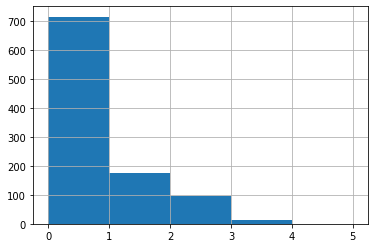

In [77]:
credit_df['CNT_CHILDREN'].hist(bins=5,range=(0,5))

What does this histogram tell us?

* Most people applying for a loan have 0 children
* This histogram doesn't follow a 'bell curve' shape so we can say this variable isn't **normally distributed**


## <font color='red'> Exercise: Histograms
    
Make histograms to show the spread of each of these variables:
* Client income: Set the number of bins to 10, and the x-axis range from 0 to 600,000
* Loan amount: Set the number of bins to 20, and the x-axis range from 0 to 2,500,000

Interpret these histograms, including:
* Are the variables **normally distributed**?
* Roughly what's the most commonly requested loan amount?
* What's the most common earnings bracket?

<a id="bar-charts"></a>

# <font color='blue'> Bar charts

## Simple bar charts

Now we want to make a visualisation to show how many loans were granted to people with different levels of education.

In [ ]:
credit_df['NAME_EDUCATION_TYPE'].value_counts().plot(kind='bar',title='Loan applications by education level');

## <font color='red'> Exercise: Bar charts
    
Make bar charts showing:

* The different marital statuses of clients
* The housing situations of clients

Interpret each bar chart to figure out:

* What the most common marital status is for loan applicants
* What the most and least common housing situation is for loan applicants

<a id="box-plots"></a>
# <font color='blue'> Box plots

We can use boxplots to quickly summarize distributions and get a **five-number summary** of a dataset:

- min = minimum value
- 25% = first quartile (Q1) = median of the lower half of the data
- 50% = second quartile (Q2) = median of the data
- 75% = third quartile (Q3) = median of the upper half of the data
- max = maximum value

**Interquartile Range (IQR)** = Q3 - Q1

**Outliers:**

- below Q1 - 1.5 * IQR
- above Q3 + 1.5 * IQR

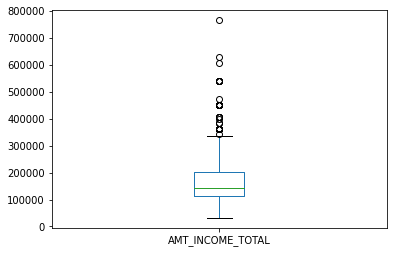

In [78]:
credit_df['AMT_INCOME_TOTAL'].plot(kind='box');

We can also look at the boxplots of income broken down by gender. This plot tells us:

* On average, male customers tend to earn more than women
* The **range** of women's salaries is smaller than men's

In [ ]:
for idx, row in credit_df.iterrows():
    
    credit.at[idx,'randomised'] = random.random()
    
    

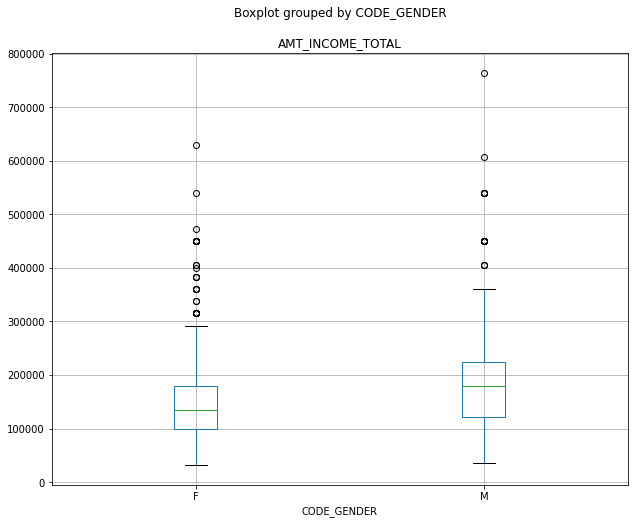

In [79]:
credit_df.boxplot(column='AMT_INCOME_TOTAL', by='CODE_GENDER',figsize=(10,8));


## <font color='red'> Exercise: Box plots
    
Make box plots to answer the following questions.

* Do men tend to apply for larger loans than women?
* Do people with higher levels of education have higher salaries on average?
* Do people with higher levels of education have more debt?


<a id="scatter-plots"></a>

# <font color='blue'> Scatter plots
    
Scatter plots can be used to show the relationship between two variables. 

Let's do this using the credit dataset, to show the relationship between income and loan amount.


<AxesSubplot:xlabel='AMT_INCOME_TOTAL', ylabel='AMT_CREDIT'>

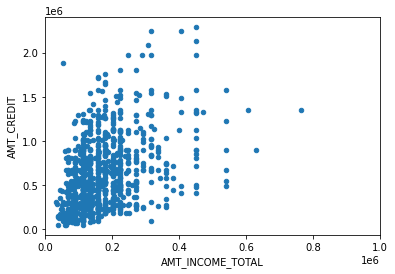

In [80]:
credit_df.plot(kind='scatter',x='AMT_INCOME_TOTAL',y='AMT_CREDIT',xlim=(0,1000000))

What does this scatter plot tell us? 
* It looks like there's a positive correlation between a person's income and the size of the loan they're applying for

We can change the transparency of the dots to 0.3 using the `alpha` parameter.

<AxesSubplot:xlabel='AMT_INCOME_TOTAL', ylabel='AMT_CREDIT'>

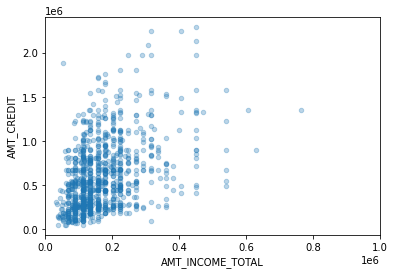

In [81]:
credit_df.plot(kind='scatter',x='AMT_INCOME_TOTAL',y='AMT_CREDIT',xlim=(0,1000000),alpha=0.3)

Now let's the colour of each point according to the value of the `TARGET` column, so each point is coloured according to whether a client has made a late payment or not. We do this using the `c` argument and the `colormap` option.


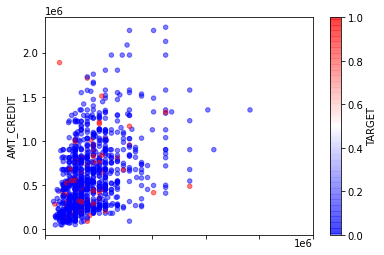

In [82]:
credit_df.plot(kind='scatter',x='AMT_INCOME_TOTAL',y='AMT_CREDIT',
                          c='TARGET',xlim=(0,1000000),colormap='bwr',alpha=0.5);


## <font color='red'> Exercise: Scatter plots
    
Make scatter plots to answer the following questions.

* Is there a correlation between a person's age **in years** and the size of the loan they're applying for? You'll need to create a new column in the DataFrame, containing the client's age in years.

* Is there a correlation between how many **years** a person has been employed for, and the size of the loan they're applying for? Again, you'll need to create a new column in the DataFrame containing the length of the client's employment in years.

You might need to use the following options to format your scatter plots:
* `xlim` and `ylim` to set the axis limits
* `alpha` to set the transparency of the points


<a id="pair-plots"></a>

# <font color='blue'> Pair plots
    
Often when we're exploring a large dataset, we'll want to answer questions like:
* What's the best subset of features to use in my model?
* Which of my features have the strongest relationship with my dependent variable?
* Which features have no correlation with my dependent variable so I can ditch them?
* What kind of relationship exists between a pair of variables? Is it linear, or something else?

Pair plots are a quick way of seeing the relationships between all the variables in our dataset in one go, and saves the hassle of having to generate lots of scatter plots one by one.

**Again, we're only plotting the first 1000 rows of the dataset; plotting the whole dataset might slow your computers down!**

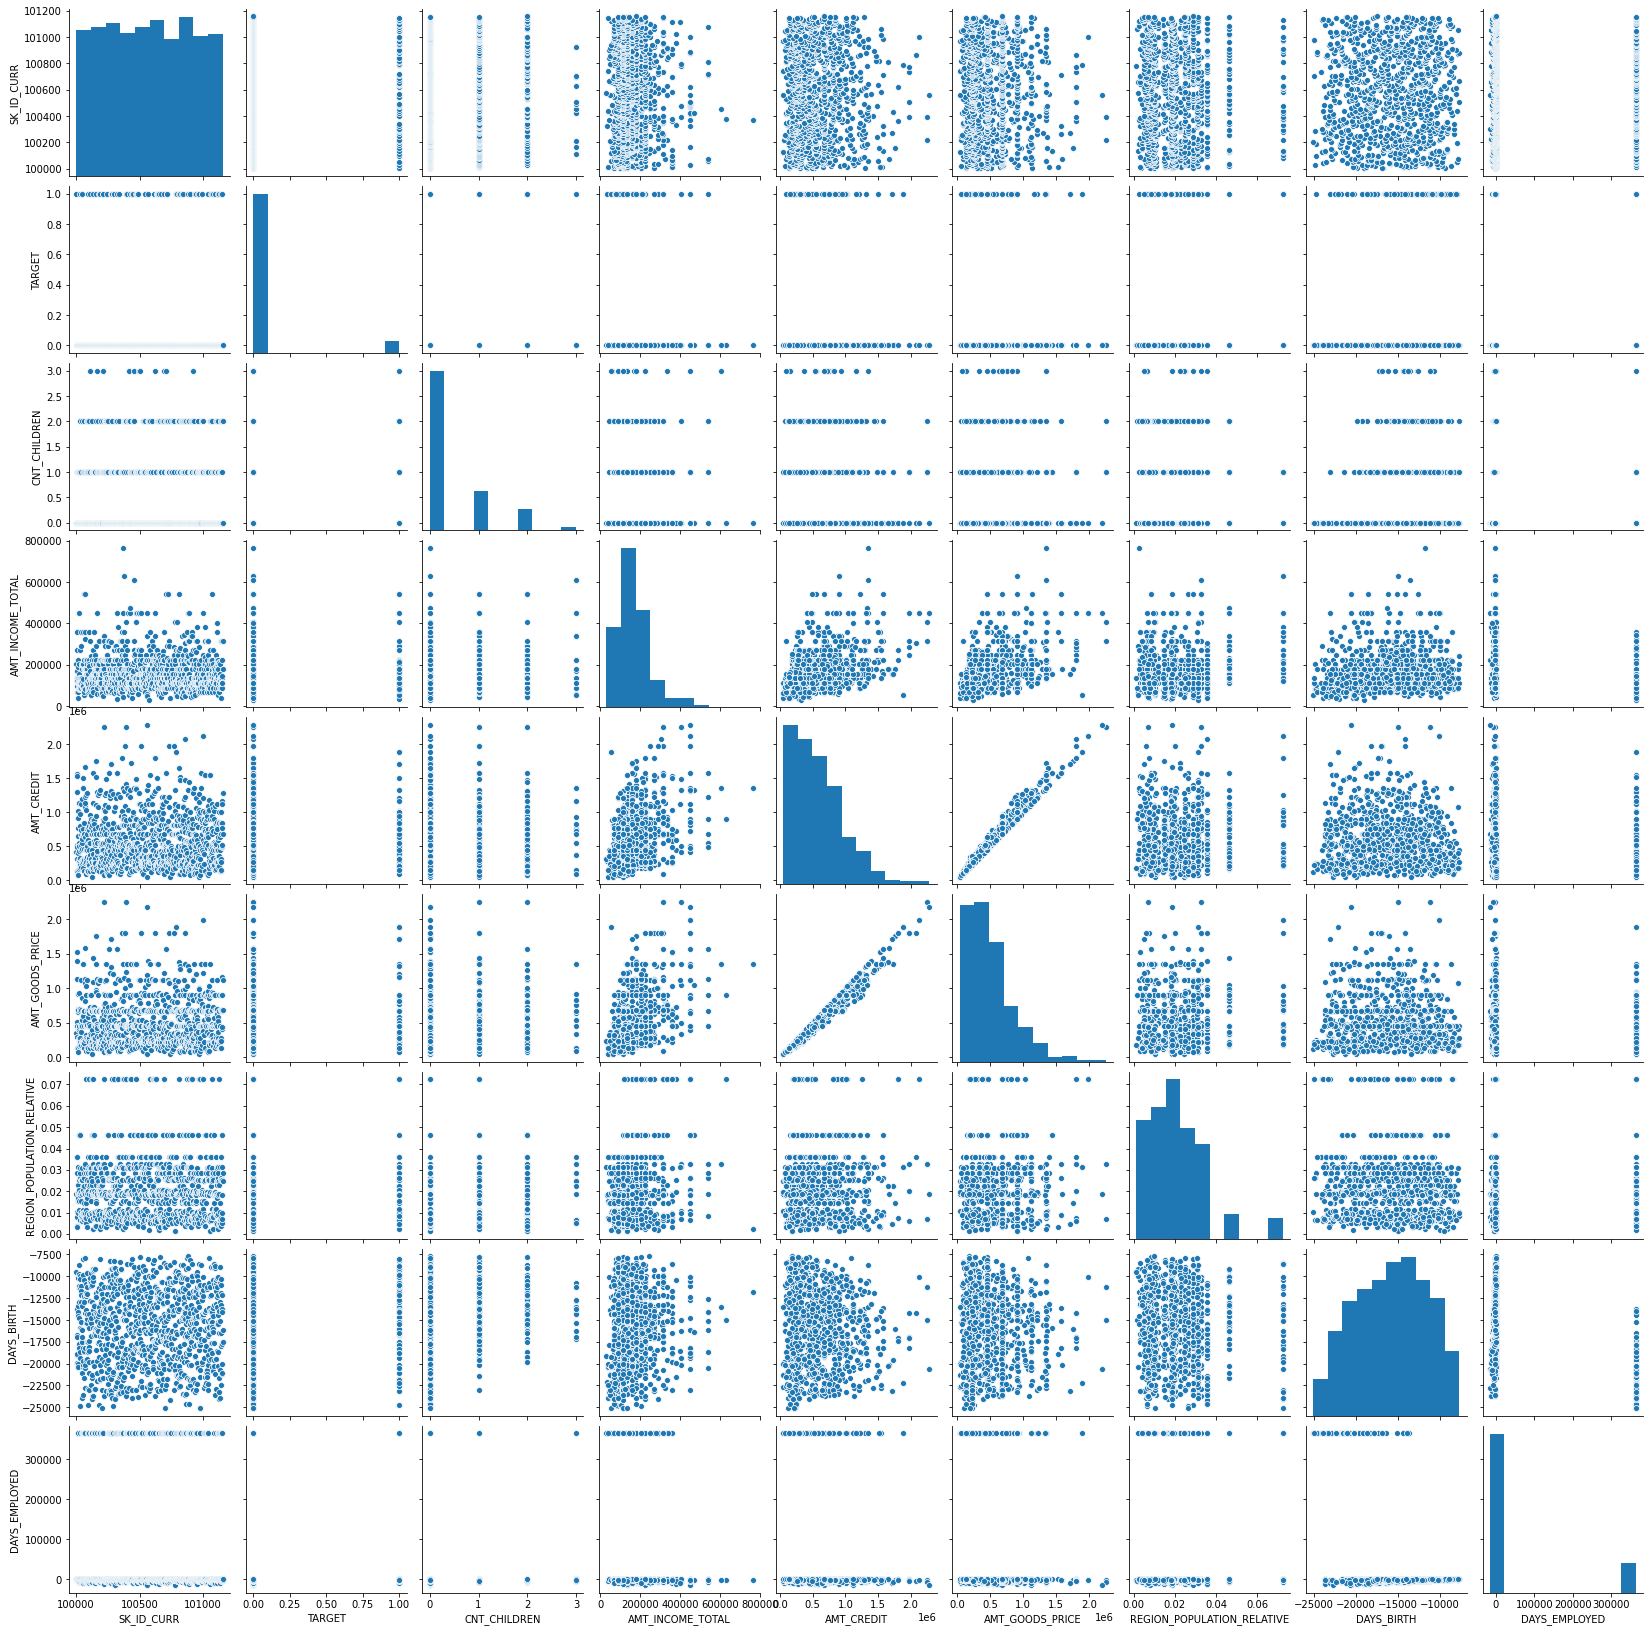

In [84]:
import seaborn as sns

sns.pairplot(credit_df)

<a id="correlation-matrix"></a>

# <font color='blue'> Correlation matrix
    
Correlation (or the correlation coefficient) tells us whether there’s an association between two variables. It can only take values from -1 to 1. 

A strongly positive correlation between two variables X and Y means:
* When X is high, Y is high 
* When X is low, Y is low 

A strongly negative correlation between two variables X and Y means:
* When X is high, Y is low 
* When X is low, Y is high 

A correlation close to zero between two variables X and Y means there’s no association between them, and both variables are just doing their own thing. 

A correlation matrix shows the correlation coefficient between every pair of variables in a dataset.


In [85]:
credit_df.corr()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED
SK_ID_CURR,1.000000,0.020122,-0.001005,-0.025893,0.011332,0.014022,0.017868,0.015128,-0.005923
TARGET,0.020122,1.000000,0.025156,-0.007218,0.008376,-0.001859,0.014064,0.082559,-0.009613
CNT_CHILDREN,-0.001005,0.025156,1.000000,0.055960,0.036836,0.035851,-0.060210,0.303782,-0.218535
AMT_INCOME_TOTAL,-0.025893,-0.007218,0.055960,1.000000,0.429317,0.439981,0.184339,0.088743,-0.208663
AMT_CREDIT,0.011332,0.008376,0.036836,0.429317,1.000000,0.986046,0.074287,-0.065100,-0.116515
AMT_GOODS_PRICE,0.014022,-0.001859,0.035851,0.439981,0.986046,1.000000,0.073531,-0.058535,-0.115613
REGION_POPULATION_RELATIVE,0.017868,0.014064,-0.060210,0.184339,0.074287,0.073531,1.000000,-0.028483,-0.003340
DAYS_BIRTH,0.015128,0.082559,0.303782,0.088743,-0.065100,-0.058535,-0.028483,1.000000,-0.587437
DAYS_EMPLOYED,-0.005923,-0.009613,-0.218535,-0.208663,-0.116515,-0.115613,-0.003340,-0.587437,1.000000


<AxesSubplot:>

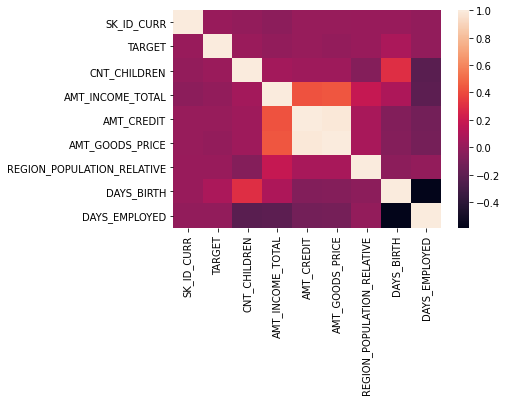

In [86]:
sns.heatmap(credit_df.corr())

---

## <font color='red'> Exercise: US election data 
    
Use pandas to read in the file `us_presidential_votes.csv` from the `data` folder, as a DataFrame called `votes`. 

Visually inspect the `DataFrame`. What do you think it contains? What does each row correspond to, and what does each column represent? Use the information available at https://www.kaggle.com/joelwilson/2012-2016-presidential-elections to help you!

Use the `columns` method to get a list of all the columns in the dataset. You'll need to refer back to this list when answering the questions below

Use `describe()` to find:

* The mean population across all counties
* The mean population density across all counties
* The smallest vote share achieved by Trump in any county
* The largest vote share achieved by Clinton in any county

Produce a histogram showing the spread of values for Trump's vote share across all counties. Is this variable normally distributed?

Produce a scatter plot to show the relationship between the proportion of people with a batchelors degree in a county, and Trump's vote share in that county. How can we interpret this scatter plot?

Produce a scatter plot to show the relationship between the proportion of over-65s in a county, and Trump's vote share in that county. How can we interpret this scatter plot?

Now let's try to find out which demographic features in a county are most strongly correlated with a high vote share for Trump. Use a combination of correlation matrices and correlation heatmaps to decide on **one** variable that you think is the strongest predictor of Trump's vote share in a county.